In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip "drive/My Drive/FashionMNIST"

Streaming output truncated to the last 5000 lines.
  inflating: FashionMNIST/Train/5/11428.jpg  
  inflating: FashionMNIST/Train/5/4600.jpg  
  inflating: FashionMNIST/Train/5/6771.jpg  
  inflating: FashionMNIST/Train/5/59336.jpg  
  inflating: FashionMNIST/Train/5/49125.jpg  
  inflating: FashionMNIST/Train/5/19712.jpg  
  inflating: FashionMNIST/Train/5/58028.jpg  
  inflating: FashionMNIST/Train/5/27830.jpg  
  inflating: FashionMNIST/Train/5/52277.jpg  
  inflating: FashionMNIST/Train/5/14222.jpg  
  inflating: FashionMNIST/Train/5/22948.jpg  
  inflating: FashionMNIST/Train/5/24487.jpg  
  inflating: FashionMNIST/Train/5/25941.jpg  
  inflating: FashionMNIST/Train/5/54160.jpg  
  inflating: FashionMNIST/Train/5/12135.jpg  
  inflating: FashionMNIST/Train/5/47652.jpg  
  inflating: FashionMNIST/Train/5/6995.jpg  
  inflating: FashionMNIST/Train/5/7453.jpg  
  inflating: FashionMNIST/Train/5/6981.jpg  
  inflating: FashionMNIST/Train/5/33879.jpg  
  inflating: FashionMNIST/Train/5/

In [4]:
# TensorFlow and tf.keras
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

TensorFlow 2.x selected.


# Read Image

In [0]:
image = cv2.imread("FashionMNIST/Train/0/3205.jpg", cv2.IMREAD_GRAYSCALE)

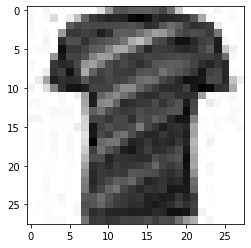

In [6]:
plt.imshow(image, cmap='gray')

# Data Preparation

In [0]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [0]:
BATCH_SIZE = 32
HEIGHT = 28
WEIGHT = 28

In [9]:
train_data_gen = image_generator.flow_from_directory(
    directory="FashionMNIST/Train",
    batch_size=BATCH_SIZE,
    target_size=(HEIGHT, WEIGHT),
    color_mode='grayscale'
)

Found 60000 images belonging to 10 classes.


In [10]:
val_data_gen = image_generator.flow_from_directory(
    directory="FashionMNIST/Test",
    batch_size=BATCH_SIZE,
    target_size=(HEIGHT, WEIGHT),
    color_mode='grayscale'
)

Found 10000 images belonging to 10 classes.


# Visualize Data

In [0]:
x_data, y_data = next(train_data_gen)

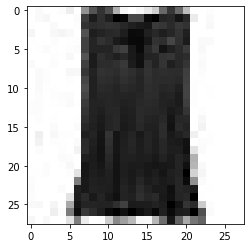

In [12]:
plt.imshow(x_data[0].reshape(28, 28), cmap='gray')

In [0]:
class_name = ["Tshier", "troueser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankel boot"]

In [14]:
class_name[np.argmax(y_data[0])]

'shirt'

# Build Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit_generator(
    train_data_gen,
    steps_per_epoch= 60000 // BATCH_SIZE,
    epochs=3,
    validation_data=val_data_gen,
    validation_steps=10000 // BATCH_SIZE
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1875 steps, validate for 312 steps
Epoch 1/3
1875/1875 [==============================] - 31s 17ms/step - loss: 0.6122 - accuracy: 0.7811 - val_loss: 0.5980 - val_accuracy: 0.7830
Epoch 2/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4841 - accuracy: 0.8252 - val_loss: 0.4715 - val_accuracy: 0.8321
Epoch 3/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4510 - accuracy: 0.8363 - val_loss: 0.5047 - val_accuracy: 0.8171


In [0]:
# if u want to save the weight
model.save_weights("model.h5")

# Prediction

In [0]:
# to load the weight that had been saved
model.load_weights("model.h5")

In [0]:
image = cv2.imread("FashionMNIST/Test/0/19.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("FashionMNIST/Test/9/0.jpg", cv2.IMREAD_GRAYSCALE)

In [0]:
images = np.array([image.reshape(28, 28, 1), image2.reshape(28, 28, 1)])

In [25]:
images.shape

(2, 28, 28, 1)

In [0]:
predictions = model.predict(images)

In [28]:
class_name[np.argmax(y_data[0])]

'shirt'